# Lab03 exercises — Markdown resources, BT example with a Python class

## Equations

This Markdown cell has **equations**, written using [*LaTeX*](http://www.latex-project.org/) syntax and rendered in the browser using [*MathJax*](http://www.mathjax.org/) (which [the Cornell Library helped develop!](http://news.library.cornell.edu/news/110104/mathjax)).

For help with LaTeX/MathJax math syntax, see:
* [Math Examples — Jupyter Notebook documentation](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)
* [A Primer on Using LaTeX in Jupyter Notebooks | Democratizing Data](http://data-blog.udacity.com/posts/2016/10/latex-primer/) — A brief blog post introducing essential notation (Bayes's theorem is an example!)
* A short [MathJax tutorial](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) at the StackExchange MathematicsMeta site
* A two-page [Quick guide to LaTeX](http://divisbyzero.com/2011/08/17/a-quick-guide-to-latex/) (PDF; useful mainly just for the list of symbols)
* A [gentle intro the basics at FluidMind.org](http://fluidmind.org/articles/typesetting-equations/) (just go through the first three sections, through "Placing Equations on Web Pages")
* The [*AMS Short Math Guide for LaTeX*](https://ctan.org/tex-archive/info/short-math-guide?lang=en) (PDF file); note that not everything described here is implemented in MathJax
* The Harvard math department hosts [An introduction to Using TeX](http://www.math.harvard.edu/texman/); for MathJax use, the "Commands for Math Mode" is most relevant

Note that equation support is an *extension* to basic Markdown, and not fully standardized.  If you are using a standalone Markdown editor/previewer, or a different browser-based Markdown editor (such as [StackEdit](https://stackedit.io/)), be aware that there are different conventions for how to set off inline and displayed equations in extended Markdown:
* [Survey of syntaxes for math in markdown](https://github.com/cben/mathdown/wiki/math-in-markdown)

### Examples

Here is *Bayes's theorem* for a posterior distribution over a set of hypotheses $\{H_i\}$ based on observed data $D$:
$$
p(H_i|D) = \frac{p(H_i) p(D|H_i)}{p(D)} \qquad ||~\mathcal{C}.
$$
And, of course, the all-important *LTP*, where $\{B_j\}$ is a *suite* (i.e., a mutually exclusive, exhaustive set of alternatives):
$$
p(H_i) = \sum_j p(H_i,B_j) = \sum_j p(B_j) p(H_i|B_j) \qquad ||~\mathcal{C}.
$$
And since it's so important, let's write the LTP with alignment (using the LaTeX *align* environment):
\begin{align}
p(H_i)
  &= \sum_j p(H_i,B_j)\\
  &= \sum_j p(B_j) p(H_i|B_j) \qquad ||~\mathcal{C}.
\end{align}

Finally, here's the *generalized beta integral*, from the lecture on categorical/multinomial inference (I'll use a *split* environment, so I can break the long equation):
\begin{split}
\int_0^\infty d\alpha_1 \cdots \int_0^\infty d\alpha_K\;
  & % ampersand indicates align here
  \alpha_1^{\kappa_1-1}\cdots\alpha_K^{\kappa_K-1} \delta\left(a-\sum_k\alpha_k\right)\\  % split!
  &= \frac{\Gamma(\kappa_1)\cdots\Gamma(\kappa_K)}{\Gamma(\kappa_0)}\; a^{\kappa_0-1}
\end{split}
where $\kappa_0 = \sum_{k=1}^K \kappa_k$.

## Tables

This Markdown cell has a table.  To automatically generate nice-looking Markdown table markup, I used
[TablesGenerator](http://www.tablesgenerator.com/markdown_tables).  This table could hold ingredients for calculating the posterior PMF for the Monty Hall problem:

| Hypothesis | Prior | Likelihood | Prior $\times$ Likelihood | Posterior |
|------------|-------|------------|---------------------------|-----------|
| A          |       |            |                           |           |
| B          |       |            |                           |           |
| C          |       |            |                           |           |
| Sum        | 1     | NA         |                           |     1     |



## A simple class:  Production line failure problem

Here we do a simple discrete-hypotheses, discrete-data problem much like the coin flipping problem done in Lec04 (with three hypotheses about $\alpha$, the probability for heads or success).

We computed probabilities numerically for that problem in a Jupyter notebook, using (global) variables to store problem info (priors, data), and a function to compute likelihoods. To treat different cases, we modified global variables, and then re-ran the whole notebook, comparing new results to previous ones by memory.

Here we'll solve a related problem, but implement the calculations using a Python class. Class instances will serve as isolated "containers" that let us handle multiple cases all together in a notebook.

### Problem setup

Consider a production line producing batches of [widgets](https://en.wikipedia.org/wiki/Widget_(economics)) (given recent past events, I'm tempted to use fidget spinners instead of widgets, but I'll resist the temptation!).

When the production line works properly (the *nominal* state), it produces widgets with a small defect rate, $\alpha$ (known from past measurements).

Sometimes the production line suffers an internal partial failure on startup, and produces widgets with a larger defect rate, $\beta$ (also known from past measurements).

Historical data indicates that the probability of failure on startup is $f$ (also known).

The production line is started and produces a batch of $N$ widgets, $n_d$ of them defective.

**_What is the posterior probability that the production line operated in the failure mode?_**

### Likelihood function

You may have noticed that the problem isn't fully specified. In particular, it's not obvious what rules governed the run producing the data. Here are two possibilities:

* Run the line to produce some target number of widgets, $N$. Count the number of defects among those $N$ widgets.
* Run the line to meet an order for $m$ good widgets, testing widgets as the line runs.

These two production strategies correspond to different likelihood functions:

* For the first, $N$ is fixed, and $n_f$ is a random number. You can probably see that the sampling distribution for $n_f$ is a multinomial distribution.
* For the second, $m$ is fixed, and $N$ is a random number; the number of failures is $n_f = N-m$.

What's the sampling distribution in the second case? For the purpose of determining whether the production line failed, does it matter which strategy was used?

### Posterior probabilities

Compute the posterior probabilities for $H_0 = $ nominal state and $H_1 =$ failure mode by filling out a probability table like this:

| Hypothesis | Prior | Likelihood | Prior $\times$ Likelihood | Posterior |
|------------|-------|------------|---------------------------|-----------|
| H_0        |       |            |                           |           |
| H_1        |       |            |                           |           |
| Sum        | 1     | NA         |                           |     1     |

(You'll probably need more room than that—do it on paper or a whiteboard.)

The formulas aren't very illuminating, so let's compute the probabilities numerically for various cases.

The accompanying Python source file, `machine_failure.py`, can be used as either a script (run at the command line) or a module (imported into other Python code, or a notebook). It defines a Python class doing the necessary calculations in two ways:

* Computing probabilities directly;
* Computing logarithms of probabilities for intermediate steps.

Ideally, these approaches should always give the same results.  But for large samples Bayesian calculations can involve summing and computing ratios of very small probabilities, smaller than floating point precision can represent. So most Bayesian codes work with logarithms of probabilities as much as possible. This won't be important for the cases we'll treat here, but it's good to get used to thinking about log-probabilities for statistical computation.

Have a look at the file.  It defines a Python class, `MachineFailure`, and some test functions.

At the end, it uses the class to run some example cases. These are in a special `if` block indicating these are meant to be computed when the file is run as a script at the command line (with a `python` or `ipython` command).  You can also run scripts in a Jupyter notebook: 

In [1]:
%run machine_failure.py

MachineFailure instance:
  Failure mode probability: 0.100
  Defect rates (nominal, failed):  0.010, 0.400
  Current data (N, n_f):  6, 2
D&S ex. 2.3.9, P(failed|D) = 0.9599761601920319

MachineFailure instance:
  Failure mode probability: 0.050
  Defect rates (nominal, failed):  0.010, 0.100
  Current data (N, n_f):  10, 1
Notebook example, 1 defect in 10, P(failed|D) = 0.18247840151803582
Update to 1 in 50: 0.004907589630595291

MachineFailure instance:
  Failure mode probability: 0.050
  Defect rates (nominal, failed):  0.010, 0.100
  Current data (N, n_f):  50, 1
All at once: 0.004907589630595291


The file also includes some functions with names starting with `test_`. These are **unit tests**, simple cases meant to test small pieces of functionality. Several Python tools exist that handles such tests.  Two popular ones that are largely interoperable are `nose` and `pytest` (`pytest` is newer and has pretty much become the popular standard). Both tools provide terminal commands that will gather and run tests in script (note: in the current Anaconda Py-3.7 distribution, `pytest` gives a warning from a bug in a SciPy test utility module):

In [2]:
!nosetests machine_failure.py

...
----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


In [3]:
!pytest machine_failure.py

============================= test session starts ==============================
platform darwin -- Python 3.7.4, pytest-5.2.1, py-1.8.0, pluggy-0.13.0
rootdir: /Volumes/Science/Education/BDA 2020/Labs/Lab03
plugins: arraydiff-0.3, remotedata-0.3.2, doctestplus-0.4.0, openfiles-0.4.0
collected 3 items                                                              

machine_failure.py ...                                                   [100%]

=============================== warnings summary ===============================
/Users/loredo/anaconda/envs/bda20/lib/python3.7/site-packages/scipy/_lib/_testutils.py:29
  /Users/loredo/anaconda/envs/bda20/lib/python3.7/site-packages/scipy/_lib/_testutils.py:29: PytestCollectionWarning: cannot collect 'test' because it is not a function.
    def __call__(self, label="fast", verbose=1, extra_argv=None, doctests=False,

-- Docs: https://docs.pytest.org/en/latest/warnings.html
======================== 3 passed, 1 warnings in 0.03s ==================

We can also import `machine_failure` as a module. Here we'll import it and add the `MachineFailure` class to the notebook's namespace (actually, having run the script, it's already here, but this is what you'd do if you didn't want to run the script first).

In [4]:
from machine_failure import MachineFailure

Use introspection for a reminder of how to use the class:

In [5]:
MachineFailure?

Prepare for cases where the production line fails 10% of the time, with nominal and failure mode defect rates of 1% and 40% (these values are from an example in a popular textbook; the script uses them for a test case, since we know the answer from the book):

In [6]:
mf = MachineFailure(.01, .4, .1)

The `update_data` method lets us (cumulatively) introduce $(N,n_f)$ data values, and the `post_failed` method computes the probability the production line is in failure mode:

In [7]:
mf.update_data(6, 2)  # N, n_f
mf.post_failed()

0.9599761601920319

So we're pretty sure the production line failed, even with that small sample and even though failure is fairly unlikely, mainly because the failure mode defect rate is so high that it gets obvious quickly when the production line has failed.

Lets look at how the probability changes as the sample size grows, when the fraction of failures is fixed near its expected value.

In [8]:
mf = MachineFailure(.01, .4, .1)

def const_freq_update(mf, f, N):
    """
    Using a MachineFailure instance, add some data with a specified fraction
    of failures, and return the total sample size and the failure mode probability.
    """
    mf.update_data(N, int(f*N))
    return mf.N, mf.post_failed()

# Gather results adding batches of different sizes using a list comprehension:
N_p = [const_freq_update(mf, .4, N) for N in [5, 5, 10, 20, 50, 100]]

# That's a list; make it an array, and show it in the notebook:
N_p = array(N_p)
N_p

array([[  5.        ,   0.97535454],
       [ 10.        ,   0.99992906],
       [ 20.        ,   1.        ],
       [ 40.        ,   1.        ],
       [ 90.        ,   1.        ],
       [190.        ,   1.        ]])

Text(0, 0.5, '$p_{\\rm failed}$, const freq.')

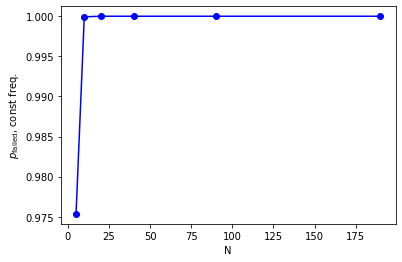

In [9]:
# Plot those data.

from matplotlib.pyplot import *
%matplotlib inline

plot(N_p[:,0], N_p[:,1], 'bo-')
xlabel('N')
ylabel(r'$p_{\rm failed}$, const freq.')

Now try a case where the nominal defect rate is already pretty high, so it gets harder to distinguish the nominal and failure modes.

In [10]:
mf = MachineFailure(.3, .4, .1)
N_p = array([const_freq_update(mf, .4, N) for N in [5, 5, 10, 20, 50, 100]])
N_p

array([[5.00000000e+00, 1.10630942e-01],
       [1.00000000e+01, 1.22238553e-01],
       [2.00000000e+01, 1.48606043e-01],
       [4.00000000e+01, 2.15188743e-01],
       [9.00000000e+01, 4.58891335e-01],
       [1.90000000e+02, 8.90263498e-01]])

Text(0, 0.5, '$p_{\\rm failed}$, const freq.')

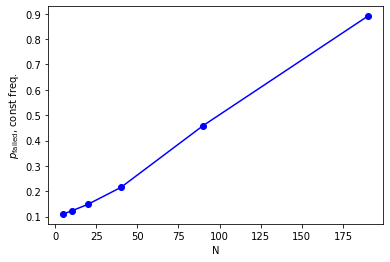

In [11]:
plot(N_p[:,0], N_p[:,1], 'bo-')
xlabel('N')
ylabel(r'$p_{\rm failed}$, const freq.')